In [28]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

import warnings

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import scorecardpy as sc
import pprint

In [29]:
DATA_PATH = Path("merged_applicant_and_bureau_cleaned_2.csv")   
df = pd.read_csv(DATA_PATH)
df

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_INCOME_TYPE,NAME_FAMILY_STATUS,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Microloan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_Another type of loan,DEBT_RATIO,OVERDUE_RATIO,YEARS_EMPLOYED
0,0,100003,0,State servant,Married,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.254795
1,1,100004,0,Working,Single / not married,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.616438
2,2,100006,0,Working,Civil marriage,0,135000.0,312682.5,29686.5,297000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.326027
3,3,100007,0,Working,Single / not married,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.323288
4,4,100008,0,State servant,Married,0,99000.0,490495.5,27517.5,454500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.350685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254353,254353,456248,0,Working,Separated,0,153000.0,331920.0,16096.5,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.884932
254354,254354,456252,0,Pensioner,Widow,0,72000.0,269550.0,12001.5,225000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254355,254355,456253,0,Working,Separated,0,153000.0,677664.0,29979.0,585000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.701370
254356,254356,456254,1,Commercial associate,Married,0,171000.0,370107.0,20205.0,319500.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.112329


In [30]:
df["TARGET"].mean()

np.float64(0.07612498918846665)

In [31]:
df = df[[
    "TARGET",
    "DEBT_RATIO",
    "AMT_ANNUITY",
    "NAME_INCOME_TYPE",
    "AMT_CREDIT",
    "AGE",
    "OCCUPATION_TYPE",
    "AMT_CREDIT_SUM_DEBT_sum",
    "YEARS_EMPLOYED"
]]
df

,TARGET,DEBT_RATIO,AMT_ANNUITY,NAME_INCOME_TYPE,AMT_CREDIT,AGE,OCCUPATION_TYPE,AMT_CREDIT_SUM_DEBT_sum,YEARS_EMPLOYED
0,0,0.0,35698.5,State servant,1293502.5,45.931507,Core staff,0.0,3.254795
1,0,NaN,6750.0,Working,135000.0,52.180822,Laborers,NaN,0.616438
2,0,NaN,29686.5,Working,312682.5,52.068493,Laborers,NaN,8.326027
3,0,NaN,21865.5,Working,513000.0,54.608219,Core staff,NaN,8.323288
4,0,NaN,27517.5,State servant,490495.5,46.413699,Laborers,NaN,4.350685
...,...,...,...,...,...,...,...,...,...
254353,0,NaN,16096.5,Working,331920.0,45.767123,Sales staff,NaN,19.884932
254354,0,NaN,12001.5,Pensioner,269550.0,56.917808,NaN,NaN,NaN
254355,0,NaN,29979.0,Working,677664.0,41.002740,Managers,NaN,21.701370
254356,1,0.0,20205.0,Commercial associate,370107.0,32.769863,Laborers,0.0,13.112329


In [32]:
df.isnull().sum()


TARGET                         0
DEBT_RATIO                 98302
AMT_ANNUITY                    9
NAME_INCOME_TYPE               0
AMT_CREDIT                     0
AGE                            0
OCCUPATION_TYPE            81149
AMT_CREDIT_SUM_DEBT_sum    98302
YEARS_EMPLOYED             47945
dtype: int64

In [33]:
# Fill numeric columns with 0
df['DEBT_RATIO'] = df['DEBT_RATIO'].fillna(0)
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)
df['AMT_CREDIT_SUM_DEBT_sum'] = df['AMT_CREDIT_SUM_DEBT_sum'].fillna(0)
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].fillna(0)

# Fill OCCUPATION_TYPE with 'MISSING'
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('MISSING')

# Verify no missing values remain
print(df.isnull().sum())

TARGET                     0
DEBT_RATIO                 0
AMT_ANNUITY                0
NAME_INCOME_TYPE           0
AMT_CREDIT                 0
AGE                        0
OCCUPATION_TYPE            0
AMT_CREDIT_SUM_DEBT_sum    0
YEARS_EMPLOYED             0
dtype: int64


C:\Users\johnt\AppData\Local\Temp\ipykernel_12896\3745332102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEBT_RATIO'] = df['DEBT_RATIO'].fillna(0)
C:\Users\johnt\AppData\Local\Temp\ipykernel_12896\3745332102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)
C:\Users\johnt\AppData\Local\Temp\ipykernel_12896\3745332102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [34]:
bins = sc.woebin(df, y = 'TARGET')

[INFO] creating woe binning ...


c:\Users\johnt\AppData\Local\Programs\Python\Python313\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\johnt\AppData\Local\Programs\Python\Python313\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\johnt\AppData\Local\Programs\Python\Python313\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer fo

In [35]:
df_woe = sc.woebin_ply(df, bins)

[INFO] converting into woe values ...


In [36]:
Y_df = df_woe.loc[:, 'TARGET']
X_df = df_woe.loc[:, df_woe.columns != 'TARGET']

In [37]:
# create a logistic regression model object
lr = linear_model.LogisticRegression(class_weight='balanced')
lr.fit(X_df, Y_df)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

intercept                      0.000045
YEARS_EMPLOYED_woe             0.671037
AMT_ANNUITY_woe                0.449706
AMT_CREDIT_woe                 0.698344
AMT_CREDIT_SUM_DEBT_sum_woe    0.416708
DEBT_RATIO_woe                 0.536908
AGE_woe                        0.456104
OCCUPATION_TYPE_woe            0.652003
NAME_INCOME_TYPE_woe           0.183806
dtype: float64

In [38]:
X_df

,YEARS_EMPLOYED_woe,AMT_ANNUITY_woe,AMT_CREDIT_woe,AMT_CREDIT_SUM_DEBT_sum_woe,DEBT_RATIO_woe,AGE_woe,OCCUPATION_TYPE_woe,NAME_INCOME_TYPE_woe
0,0.341552,0.118241,-0.194135,-0.080212,-0.082035,0.025472,-0.403097,-0.381321
1,0.341552,-0.145360,-0.136995,-0.080212,-0.082035,-0.137565,0.283467,0.177515
2,0.019023,0.118241,0.233014,-0.080212,-0.082035,-0.137565,0.283467,0.177515
3,0.019023,0.118241,0.233014,-0.080212,-0.082035,-0.137565,-0.403097,0.177515
4,0.019023,0.118241,0.233014,-0.080212,-0.082035,0.025472,0.283467,-0.381321
...,...,...,...,...,...,...,...,...
254353,-0.554031,0.118241,0.233014,-0.080212,-0.082035,0.025472,0.283467,0.177515
254354,-0.219640,-0.145360,0.020231,-0.080212,-0.082035,-0.364031,-0.212107,-0.327971
254355,-0.554031,0.118241,-0.040114,-0.080212,-0.082035,0.025472,-0.212107,0.177515
254356,-0.277549,0.118241,0.233014,-0.080212,-0.082035,0.288063,0.283467,-0.094160


In [39]:
card = sc.scorecard(bins, lr, X_df.columns, points0 = 600, odds0 = 1/19, pdo = 20, basepoints_eq0 = True)

pprint.pprint(card)

{'AGE':    variable          bin  points
21      AGE  [-inf,38.0)    61.0
22      AGE  [38.0,50.0)    64.0
23      AGE  [50.0,55.0)    66.0
24      AGE   [55.0,inf)    69.0,
 'AMT_ANNUITY':       variable                bin  points
5  AMT_ANNUITY     [-inf,16000.0)    66.0
6  AMT_ANNUITY  [16000.0,36000.0)    63.0
7  AMT_ANNUITY  [36000.0,44000.0)    65.0
8  AMT_ANNUITY      [44000.0,inf)    69.0,
 'AMT_CREDIT':       variable                   bin  points
9   AMT_CREDIT       [-inf,250000.0)    67.0
10  AMT_CREDIT   [250000.0,300000.0)    64.0
11  AMT_CREDIT   [300000.0,650000.0)    60.0
12  AMT_CREDIT   [650000.0,900000.0)    65.0
13  AMT_CREDIT  [900000.0,1350000.0)    68.0
14  AMT_CREDIT       [1350000.0,inf)    77.0,
 'AMT_CREDIT_SUM_DEBT_sum':                    variable               bin  points
15  AMT_CREDIT_SUM_DEBT_sum     [-inf,8000.0)    65.0
16  AMT_CREDIT_SUM_DEBT_sum  [8000.0,44000.0)    60.0
17  AMT_CREDIT_SUM_DEBT_sum     [44000.0,inf)    57.0,
 'DEBT_RATIO':       va

In [40]:
# sample code

# credit score for samples in test and train
df_score = sc.scorecard_ply(df, card)

# sample code

# check model performance at 1:5 odds of default
cutoff = 500

# create sets of predicted bad to compare with actual bad
predicted_bad_train = (df_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(metrics.confusion_matrix(Y_df, predicted_bad_train_list))
print('PCC measures:')
print(metrics.classification_report(Y_df, predicted_bad_train_list))
 

*** Training Data Performance ***
Confusion matrix:
[[216752  18243]
 [ 15935   3428]]
PCC measures:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93    234995
           1       0.16      0.18      0.17     19363

    accuracy                           0.87    254358
   macro avg       0.54      0.55      0.55    254358
weighted avg       0.87      0.87      0.87    254358



In [41]:
# sample code

# generate a card from the model and bins. The scores will be based on probability of default from the model
# bins = bins created from sc.woebin
# lr = fitted logistic regression model
# align target odds with probabity of default = 7.6% 
# odds = p/(1-p) = 0.076/(1-0.076) = 0.0825 ~= 1/12
card = sc.scorecard(bins, lr, X_df.columns, points0 = 600, odds0 = 1/12, pdo = 20, basepoints_eq0 = True)

pprint.pprint(card)

{'AGE':    variable          bin  points
21      AGE  [-inf,38.0)    62.0
22      AGE  [38.0,50.0)    66.0
23      AGE  [50.0,55.0)    68.0
24      AGE   [55.0,inf)    71.0,
 'AMT_ANNUITY':       variable                bin  points
5  AMT_ANNUITY     [-inf,16000.0)    68.0
6  AMT_ANNUITY  [16000.0,36000.0)    65.0
7  AMT_ANNUITY  [36000.0,44000.0)    66.0
8  AMT_ANNUITY      [44000.0,inf)    70.0,
 'AMT_CREDIT':       variable                   bin  points
9   AMT_CREDIT       [-inf,250000.0)    69.0
10  AMT_CREDIT   [250000.0,300000.0)    66.0
11  AMT_CREDIT   [300000.0,650000.0)    61.0
12  AMT_CREDIT   [650000.0,900000.0)    67.0
13  AMT_CREDIT  [900000.0,1350000.0)    70.0
14  AMT_CREDIT       [1350000.0,inf)    78.0,
 'AMT_CREDIT_SUM_DEBT_sum':                    variable               bin  points
15  AMT_CREDIT_SUM_DEBT_sum     [-inf,8000.0)    67.0
16  AMT_CREDIT_SUM_DEBT_sum  [8000.0,44000.0)    62.0
17  AMT_CREDIT_SUM_DEBT_sum     [44000.0,inf)    59.0,
 'DEBT_RATIO':       va

In [42]:
loan_amount = df['AMT_CREDIT']

# Define loss per defaulting loan (mean loan amount)
loss_per_defaulting_loan = df['AMT_CREDIT'].mean()  # Mean loan amount as loss for defaults

# Realistic assumptions for consumer loans
interest_rate = 0.1  # 10% annual interest rate
loan_term_years = 5  # Loan term in years (realistic for personal loans)

# Calculate monthly repayment based on the loan amount
monthly_interest_rate = interest_rate / 12
num_payments = loan_term_years * 12  # 5 years, monthly payments
loan_amount = df['AMT_CREDIT'].mean()

# Monthly payment calculation (Loan Amortization Formula)
monthly_payment = loan_amount * monthly_interest_rate / (1 - (1 + monthly_interest_rate) ** -num_payments)
total_repayment = monthly_payment * num_payments  # Total repayment over the loan term

# Profit from successful loan (total repayment minus the loan amount)
profit_per_successful_loan = total_repayment - loan_amount

print("Profit per Successful Loan:", profit_per_successful_loan)
print("Loss per Defaulting Loan:", loss_per_defaulting_loan)



Profit per Successful Loan: 173144.4666241191
Loss per Defaulting Loan: 630022.4746302456


In [43]:
# Function to calculate profit and loss at different cutoff values
def calculate_profit(cutoff, scores, actuals, loan_amount):
    # Predicted labels based on cutoff score

    # create sets of predicted bad to compare with actual bad
    predicted_bad_train = (scores < cutoff)
    predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
    
    # Confusion Matrix (TN, FP, FN, TP)
    cm = metrics.confusion_matrix(Y_df, predicted_bad_train_list)
    TN, FP, FN, TP = cm.ravel()

    print("Number of Successful Loan: ", TN)
    print("Number of Failed Loan: ", FN)

    # Profit from successful loans (loans predicted to be "good" and actually good)
    successful_loans = TN  
    profit = successful_loans * profit_per_successful_loan

    print("profit: ", profit)
    
    # Loss from defaults (loans predicted to be "bad" but they were actually good (FP) or predicted and actually bad (TP))
    defaulting_loans = FN 
    loss = defaulting_loans * loss_per_defaulting_loan

    print("loss: ", loss)
    print("-----------")
    
    # Net Profit (Profit - Loss)
    net_profit = profit - loss 
    
    return net_profit


In [44]:
test_score = sc.scorecard_ply(df, card)

In [45]:
# Example cutoff values to test
cutoffs = [250, 300, 350, 400, 425, 450, 475, 500, 525, 550, 575, 600]

# Empty list to store profits for each cutoff
profits = []

# Calculate profit for each cutoff
for cutoff in cutoffs:
    profit = calculate_profit(cutoff, df_score, Y_df, loan_amount)
    profits.append(profit)


Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  234995
Number of Failed Loan:  19363
profit:  40688083934.33486
loss:  12199125176.265446
-----------
Number of Successful Loan:  216752
Number of Failed Loan:  15935
profit:  37529409429.7110

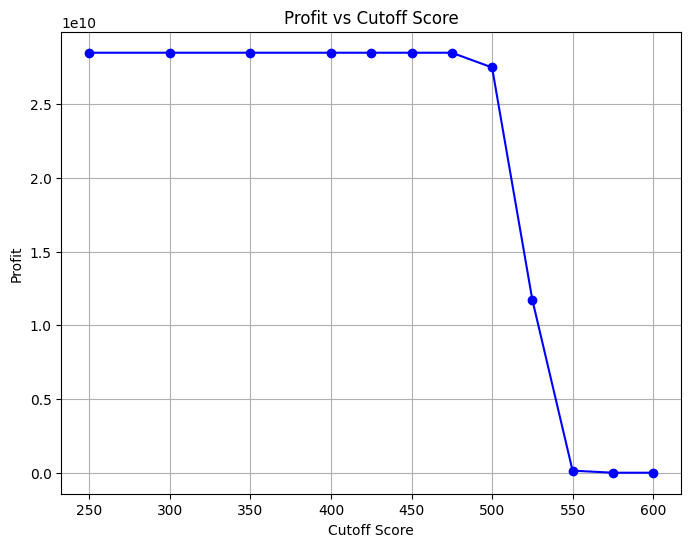

In [46]:
# Plotting the profit at different cutoff scores
plt.figure(figsize=(8, 6))
plt.plot(cutoffs, profits, marker='o', linestyle='-', color='b')
plt.title("Profit vs Cutoff Score")
plt.xlabel("Cutoff Score")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

Cutoff: 425
  Successful loans (TP): 234995
  Defaulting loans (FP): 19363
  Profit: 40688083934.33486
  Loss: 12199125176.265446
  Net Profit: 28488958758.069416
-----------
Cutoff: 450
  Successful loans (TP): 234995
  Defaulting loans (FP): 19363
  Profit: 40688083934.33486
  Loss: 12199125176.265446
  Net Profit: 28488958758.069416
-----------
Cutoff: 475
  Successful loans (TP): 234995
  Defaulting loans (FP): 19363
  Profit: 40688083934.33486
  Loss: 12199125176.265446
  Net Profit: 28488958758.069416
-----------
Cutoff: 478
  Successful loans (TP): 234831
  Defaulting loans (FP): 19304
  Profit: 40659688241.80851
  Loss: 12161953850.26226
  Net Profit: 28497734391.54625
-----------
Cutoff: 480
  Successful loans (TP): 234427
  Defaulting loans (FP): 19170
  Profit: 40589737877.292366
  Loss: 12077530838.661808
  Net Profit: 28512207038.630558
-----------
Cutoff: 481
  Successful loans (TP): 234380
  Defaulting loans (FP): 19157
  Profit: 40581600087.36103
  Loss: 12069340546.491

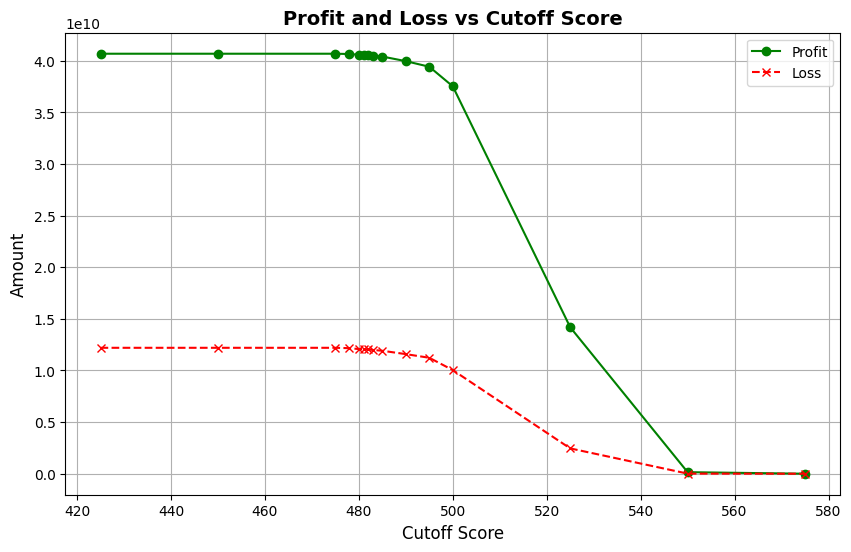

In [ ]:

# --- FUNCTION ---
def calculate_profit_loss(cutoff, scores, actuals):
    """
    Calculate profit, loss, and net profit for a given cutoff.
    Higher scores = better borrowers.
    Predict GOOD if score >= cutoff.
    """
    # Predicted "bad" (defaults) if score < cutoff
    predicted_bad = (scores < cutoff)
    predicted_bad_list = predicted_bad.astype(int).values.flatten().tolist()

    # Confusion Matrix (assuming Y_df: positive case = good borrower, 0 = bad borrower)
    cm = metrics.confusion_matrix(actuals, predicted_bad_list)
    TP, FN, FP, TN = cm.ravel()

    # Correct mapping:
    # TP → predicted good, actually good  (True Positives)
    # FP → predicted good, actually bad   (False Positives)
    # FN → predicted bad, actually good   (False Negatives)
    # TN → predicted bad, actually bad    (True Negatives)

    # --- Compute profit and loss ---
    successful_loans = TP   # loans we approved and were good
    defaulting_loans = FP   # loans we approved but defaulted

    profit = successful_loans * profit_per_successful_loan
    loss = defaulting_loans * loss_per_defaulting_loan
    net_profit = profit - loss

    print(f"Cutoff: {cutoff}")
    print(f"  Successful loans (TP): {successful_loans}")
    print(f"  Defaulting loans (FP): {defaulting_loans}")
    print(f"  Profit: {profit}")
    print(f"  Loss: {loss}")
    print(f"  Net Profit: {net_profit}")
    print("-----------")

    return profit, loss, net_profit


# --- TEST ACROSS CUTTOFFS ---
cutoffs = [  425, 450, 475,478 ,480,481, 482, 483, 485, 490, 495, 500, 525, 550, 575]

profits = []
losses = []
net_profits = []

for cutoff in cutoffs:
    profit, loss, net = calculate_profit_loss(cutoff, df_score, Y_df)
    profits.append(profit)
    losses.append(loss)
    net_profits.append(net)


# --- PLOT PROFIT & LOSS ---
plt.figure(figsize=(10, 6))
plt.plot(cutoffs, profits, marker='o', linestyle='-', color='green', label='Profit')
plt.plot(cutoffs, losses, marker='x', linestyle='--', color='red', label='Loss')
plt.title("Profit and Loss vs Cutoff Score", fontsize=14, fontweight='bold')
plt.xlabel("Cutoff Score", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
